In [51]:
####################################
#########  librerias  ##############
####################################
#manejo de datos
import pandas as pd
import numpy as np

#graficar
import matplotlib.pyplot as plt
import seaborn as sns

#modelar
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

#importar dataset desde drive
from google.colab import drive
######################################

##MODELO REGRESIÓN LINEAL SIMPLE

In [ ]:
#trabajar con mod regresión lineal simple
from sklearn.linear_model import LinearRegression

In [ ]:
#cargar dataset de salarios
salarios = pd.read_csv('salarios.csv')

In [ ]:
salarios.head()

,Aexperiencia,Salario
0,10.0,42500
1,8.0,36302
2,5.4,35000
3,2.5,18103
4,1.0,15000


In [ ]:
salarios.shape

(30, 2)

In [ ]:
#dividir los datos en X e Y
x = salarios.iloc[:, :-1].values
y = salarios.iloc[:, :1].values

In [ ]:
#hacer conjuntos de train y test
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
#test_size = 0.2 (tamaño de los datos de testeo), random_state = 0 (en 0 significa que son datos aleatorios y siempre los mismos)

In [ ]:
#creando modelo de regresión lineal y entrenandolo
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

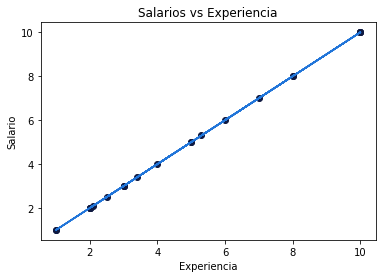

In [ ]:
#visualizar resultados
viz_train = plt
viz_train.scatter(X_train, Y_train, color = '#0f1941') #mostrar puntos 
viz_train.plot(X_train, regressor.predict(X_train), color = '#2175d9')
viz_train.title('Salarios vs Experiencia')
viz_train.xlabel('Experiencia')
viz_train.ylabel('Salario')
viz_train.show()

##MODELO REGRESIÓN LOGÍSTICA

In [11]:
#cargar dataset diabetes
diabetes = pd.read_csv('/content/drive/My Drive/datasets/diabetes.csv')

In [12]:
#seleccionar modelo de regresión logística
from sklearn.linear_model import LogisticRegression

In [13]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
diabetes.shape

(768, 9)

In [15]:
diabetes.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [16]:
#construir X e Y
diabetes.columns
feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
x = diabetes[feature_cols]
y = diabetes.Outcome

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [30]:
#crear modelo
logreg = LogisticRegression(max_iter = 1000) #usar la función de regresión logística con un max de iteraciones de 1000
logreg.fit(X_train, Y_train) #entrenar modelo
Y_pred = logreg.predict(X_test) #resultado predicción

In [31]:
Y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0])

In [35]:
#crear matriz de confusión
cnf_matrix = confusion_matrix(Y_test, Y_pred)
cnf_matrix

array([[118,  12],
       [ 26,  36]])

In [50]:
#exactitud = VP + VN / TOTAL
#error = FP + FN / TOTAL
exactitud = (118 + 36) / (118 + 12 + 26 + 36)
error = (26 + 12) / (118 + 12 + 26 + 36)
print(exactitud)
print(error)

0.8020833333333334
0.19791666666666666


##MODELO ÁRBOLES DE DECISIÓN